In [308]:
import numpy as np 
import matplotlib.pyplot as plt 
import random 

# The CAT dataset 

First off, let us define what does C, A and T mean. 

In [662]:
C= np.array([
             [1.,1.,1.],
             [1.,0.,0.],
             [1.,1.,1.]
])

A = np.array([
             [0.,1.,0.],
             [1.,0.,1.], 
             [1.,0.,1.]
])
                        
T = np.array([
             [1.,1.,1.],
             [0.,1.,0.],
             [0.,1.,0.]
])

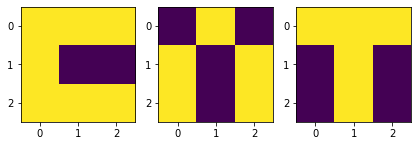

In [663]:
fig, ax = plt.subplots(1, 3, figsize = (7,20))

ax.flat[0].imshow(C)
ax.flat[1].imshow(A)
ax.flat[2].imshow(T)

In [664]:
labels = {
    "C": 0,
    "A": 1,
    "T": 2
}

## The neural network 



In [665]:
train_data = np.array([
                       (C, int(labels["C"])), 
                       (A, int(labels['A'])),
                       (T, int(labels["T"]))
                    ])

In [666]:
class data_loader(object):
    def __init__(self, data):
        self.data = data

    def random_element(self):
        index = random.randint(0, self.data.shape[0] -1)
        return self.data[index]

    def element(self, index):
        return self.data[index]

In [667]:
train_loader = data_loader(data = train_data)

In [668]:
def mse_loss(pred,label):
    loss = np.square(np.subtract(pred,label)).mean() 
    return loss 

In [619]:
def dloss_by_pred(pred, label):

    d = 2*(pred-label)
    return np.array([d])

def drelu(x):
    x[x>0] = 1
    x[x<=0] = 0
    return x


In [647]:
def relu(m):
    m[m < 0] = 0
    return m

def leaky_relu(z, alpha):
    pair = np.array([alpha*z,z])
    return np.max(pair, axis = 0)

class at_least_i_didnt_steal_this_project_idea_from_some_course(object):
    def __init__(self):

        self.layer1 = np.random.randn(9, 15)
        self.layer2 = np.random.randn(15, 1)

    def forward(self,input):

        self.x = input.flatten().reshape(1,-1)
        x_w1 = self.x.dot(self.layer1)
        self.x_w1_relu = relu(x_w1)
        self.x_w2 = self.x_w1_relu.dot(self.layer2)
        x_w2_relu = relu(self.x_w2)

        return x_w2_relu

    def take_blind_step(self):

        self.layer1 += np.random.rand(9,15)/5
        self.layer2 += np.random.rand(15,1)/5

    def backward_pass(self,pred,label):

        self.dloss_by_dw2 = drelu(self.x_w1_relu).reshape(-1,1).dot(dloss_by_pred(pred,label).reshape(1,-1))
        self.dloss_by_dw1 = self.x.reshape(-1,1).dot(self.dloss_by_dw2.reshape(1,-1))

    def update_weights(self, step_size = 0.01):

        self.layer1 += - step_size * self.dloss_by_dw1
        self.layer2 += - step_size * self.dloss_by_dw2

In [621]:
chicken_brain = at_least_i_didnt_steal_this_project_idea_from_some_course()

In [622]:
chicken_brain.forward(train_data[0][0])

array([[7.69080087]])

In [623]:
pred = chicken_brain.forward(train_data[0][0]).flatten()[0]
label = 10.0

mse_loss(pred,label)

5.3324006052338255

In [624]:
print(pred,label)

7.690800873628732 10.0


In [625]:
chicken_brain.backward_pass(pred,label)

In [626]:
chicken_brain.update_weights()

In [627]:
pred = chicken_brain.forward(train_data[0][0]).flatten()[0]
label = 10.

mse_loss(pred,label)

0.9517163005986101

In [628]:
pred,label

(9.02444051918983, 10.0)

In [783]:
chicken_brain = at_least_i_didnt_steal_this_project_idea_from_some_course()
losses = []
for iter in range(20):
    

    x, label = train_loader.element(iter%3)
    pred = chicken_brain.forward(x).flatten()[0]
    loss = mse_loss(pred,label)
    losses.append(loss)

    chicken_brain.backward_pass(pred,label)
    chicken_brain.update_weights()


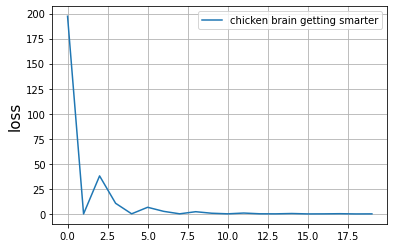

In [791]:
plt.plot(losses, label = "chicken brain getting smarter")
plt.ylabel("loss", fontsize = 15)
plt.grid()
plt.legend()
plt.show()

In [788]:
print("Pred on C: ", chicken_brain.forward(C)[0][0])
print("Pred on A: ", chicken_brain.forward(A)[0][0])
print("Pred on T: ", chicken_brain.forward(T)[0][0])

Pred on C:  0.007372664851417978
Pred on A:  0.8018386026774065
Pred on T:  2.361728449561949


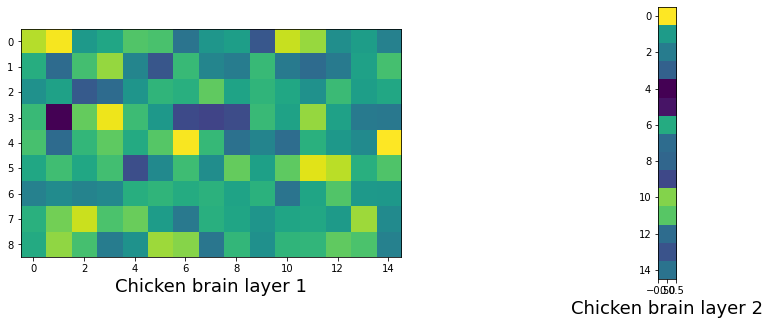

In [789]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

ax.flat[0].imshow(chicken_brain.layer1)
ax.flat[0].set_xlabel("Chicken brain layer 1", fontsize = 18)
ax.flat[1].imshow(chicken_brain.layer2)
ax.flat[1].set_xlabel("Chicken brain layer 2", fontsize = 18)
fig.show()